###  MicroGrad demo

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

In [3]:
np.random.seed(1337)
random.seed(1337)

(1797, 64)


<Figure size 640x480 with 0 Axes>

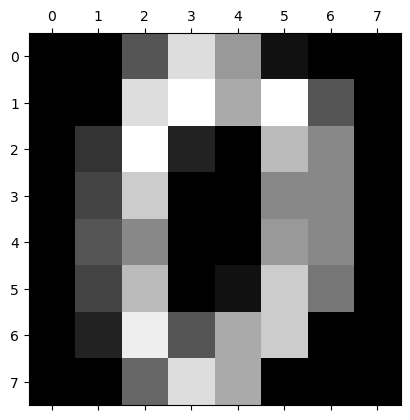

In [4]:
# make up a dataset

from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [5]:
len(digits.data[0])


64

In [6]:
digits.target


array([0, 1, 2, ..., 8, 9, 8])

In [7]:
d_data_train = digits.data[:15]
d_target_train = digits.target[:15]

d_data_test = digits.data[1500:]
d_target_test = digits.target[1500:]


In [8]:
# initialize a model 
model = MLP(64, [16, 16, 10]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

MLP of [Layer of [ReLUNeuron(64), ReLUNeuron(64), ReLUNeuron(64), ReLUNeuron(64), ReLUNeuron(64), ReLUNeuron(64), ReLUNeuron(64), ReLUNeuron(64), ReLUNeuron(64), ReLUNeuron(64), ReLUNeuron(64), ReLUNeuron(64), ReLUNeuron(64), ReLUNeuron(64), ReLUNeuron(64), ReLUNeuron(64)], Layer of [ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16)], Layer of [LinearNeuron(16), LinearNeuron(16), LinearNeuron(16), LinearNeuron(16), LinearNeuron(16), LinearNeuron(16), LinearNeuron(16), LinearNeuron(16), LinearNeuron(16), LinearNeuron(16)]]
number of parameters 1482


In [9]:
def softmax(logits):
    # Calculate the exponentials and then normalize them
    exps = [Value(np.exp(x.data)) for x in logits]
    sum_of_exps = sum(exps)
    return [x / sum_of_exps for x in exps]

import math
def cross_entropy_loss(logits, label):
    # Apply softmax to logits
    probs = softmax(logits)
    # Calculate the negative log likelihood of the correct class
    return -math.log(probs[label].data)





def loss(batch_size=None):
    if batch_size is None:
        Xb, yb = digits.data, digits.target
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    # forward the model to get scores for each example in the batch
    logits = list(map(model, inputs))
    
    # compute losses for each example in the batch
    losses = [cross_entropy_loss(logit, yi) for logit, yi in zip(logits, yb)]
    data_loss = sum(losses) / len(losses)
    
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # calculate accuracy (using argmax to find predicted labels)
    accuracy = sum([logit[yi].data == max([l.data for l in logit]) for logit, yi in zip(logits, yb)]) / len(yb)
    
    return total_loss, accuracy
total_loss, acc = loss()
print(total_loss, acc)

Value(data=152.91668801182607, grad=0) 0.10684474123539232


In [10]:
# optimization
for k in range(100):
    
    # forward
    total_loss, acc = loss()
    
    # backward
    model.zero_grad()
    total_loss.backward()
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")


step 0 loss 152.91668801182607, accuracy 10.684474123539232%
step 1 loss 152.8249825209659, accuracy 10.684474123539232%
step 2 loss 152.7341567394789, accuracy 10.684474123539232%
step 3 loss 152.64420916192392, accuracy 10.684474123539232%
step 4 loss 152.55513829797826, accuracy 10.684474123539232%
step 5 loss 152.46694267240068, accuracy 10.684474123539232%
step 6 loss 152.37962082498544, accuracy 10.684474123539232%
step 7 loss 152.29317131052747, accuracy 10.684474123539232%
step 8 loss 152.2075926987785, accuracy 10.684474123539232%


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x10702c7d0>>
Traceback (most recent call last):
  File "/nix/store/4x8i1pm28iqqxi03ii1146dpkj5wpdhy-python3.11-ipykernel-6.29.4/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


step 9 loss 152.12288357440897, accuracy 10.684474123539232%
step 10 loss 152.0390425369706, accuracy 10.684474123539232%
step 11 loss 151.9560682008537, accuracy 10.684474123539232%


In [ ]:
# test accuracy
total_loss, acc = loss(batch_size=len(d_data_test))
print(f"test loss {total_loss.data}, test accuracy {acc*100}%")

: 

ModuleNotFoundError: No module named 'torch.nn'; 'torch' is not a package